In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.cluster import KMeans
from pylab import rcParams
%matplotlib inline
rcParams["figure.figsize"] = 12, 8

In [129]:
# loading and reading dataset
df = pd.read_csv("/content/Crime_Data_from_2020.csv")
df


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986495,242011172,08/20/2024 12:00:00 AM,08/17/2024 12:00:00 AM,2300,20,Olympic,2033,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,3700 WILSHIRE BL,NaN,34.0617,-118.3066
986496,240710284,07/24/2024 12:00:00 AM,07/23/2024 12:00:00 AM,1400,7,Wilshire,788,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,4000 W 23RD ST,NaN,34.0362,-118.3284
986497,240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,1300 W SUNSET BL,NaN,34.0685,-118.2460
986498,240309674,04/24/2024 12:00:00 AM,04/24/2024 12:00:00 AM,1500,3,Southwest,358,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,FLOWER ST,JEFFERSON BL,34.0215,-118.2868


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986500 entries, 0 to 986499
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           986500 non-null  int64  
 1   Date Rptd       986500 non-null  object 
 2   DATE OCC        986500 non-null  object 
 3   TIME OCC        986500 non-null  int64  
 4   AREA            986500 non-null  int64  
 5   AREA NAME       986500 non-null  object 
 6   Rpt Dist No     986500 non-null  int64  
 7   Part 1-2        986500 non-null  int64  
 8   Crm Cd          986500 non-null  int64  
 9   Crm Cd Desc     986500 non-null  object 
 10  Mocodes         840065 non-null  object 
 11  Vict Age        986500 non-null  int64  
 12  Vict Sex        846925 non-null  object 
 13  Vict Descent    846914 non-null  object 
 14  Premis Cd       986486 non-null  float64
 15  Premis Desc     985915 non-null  object 
 16  Weapon Used Cd  326368 non-null  float64
 17  Weapon Des

In [131]:
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,9.865000e+05,986500.000000,986500.000000,986500.000000,986500.000000,986500.000000,986500.000000,986486.000000,326368.000000,986489.000000,68912.000000,2310.000000,64.00000,986500.000000,986500.000000
mean,2.198270e+08,1339.086392,10.698086,1116.245129,1.403666,500.782398,29.045177,306.054803,363.846008,500.538333,958.162091,984.198701,991.21875,33.996033,-118.083281
std,1.299240e+07,651.457178,6.108873,611.002343,0.490632,206.092913,21.976666,219.156166,123.699000,205.891829,110.250287,51.495991,27.06985,1.633543,5.661853
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.00000,0.000000,-118.667600
25%,2.106103e+08,900.000000,5.000000,587.000000,1.000000,331.000000,0.000000,101.000000,311.000000,331.000000,998.000000,998.000000,998.00000,34.014600,-118.430500
50%,2.208174e+08,1420.000000,11.000000,1141.000000,1.000000,442.000000,30.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.00000,34.058900,-118.322500
75%,2.310049e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,44.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.00000,34.164900,-118.273900
max,2.499289e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.00000,34.334300,0.000000


In [132]:
df['Vict Descent'].unique()  # Check unique values in a column

array(['O', 'X', 'H', 'B', 'W', nan, 'A', 'K', 'C', 'J', 'F', 'I', 'V',
       'S', 'P', 'Z', 'G', 'U', 'D', 'L', '-'], dtype=object)

In [133]:
#dropping all rows having null values
dfresult = df.dropna()
print(dfresult)

            DR_NO               Date Rptd                DATE OCC  TIME OCC  \
66057   201904032  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM      2135   
86512   200613424  08/02/2020 12:00:00 AM  08/02/2020 12:00:00 AM      2030   
363684  210617136  10/08/2021 12:00:00 AM  10/07/2021 12:00:00 AM      1950   
372452  210209196  05/08/2021 12:00:00 AM  05/08/2021 12:00:00 AM       230   
489969  220600626  04/27/2022 12:00:00 AM  04/23/2022 12:00:00 AM      2300   
537698  221718232  12/25/2022 12:00:00 AM  12/25/2022 12:00:00 AM      1150   
585848  221401314  11/10/2022 12:00:00 AM  11/10/2022 12:00:00 AM      2117   
728299  231717599  11/15/2023 12:00:00 AM  11/15/2023 12:00:00 AM       400   
809130  231915572  10/21/2023 12:00:00 AM  10/21/2023 12:00:00 AM         1   
926328  241905348  02/04/2024 12:00:00 AM  02/03/2024 12:00:00 AM      1100   

        AREA   AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
66057     19     Mission         1924         1     761   
86512      6

In [134]:
#dropping all columns having null values
df1result = df.dropna(axis=1)
print(df1result)

            DR_NO               Date Rptd                DATE OCC  TIME OCC  \
0       190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130   
1       200106753  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM      1800   
2       200320258  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM      1700   
3       200907217  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM      2037   
4       220614831  08/18/2022 12:00:00 AM  08/17/2020 12:00:00 AM      1200   
...           ...                     ...                     ...       ...   
986495  242011172  08/20/2024 12:00:00 AM  08/17/2024 12:00:00 AM      2300   
986496  240710284  07/24/2024 12:00:00 AM  07/23/2024 12:00:00 AM      1400   
986497  240104953  01/15/2024 12:00:00 AM  01/15/2024 12:00:00 AM       100   
986498  240309674  04/24/2024 12:00:00 AM  04/24/2024 12:00:00 AM      1500   
986499  240910892  08/13/2024 12:00:00 AM  08/12/2024 12:00:00 AM      2300   

        AREA  AREA NAME  Rpt Dist No  Part 1-2  Crm

In [135]:
df.drop_duplicates(inplace=True)  # Remove duplicate rows

In [136]:
from sklearn.preprocessing import StandardScaler

# 1. Convert 'Vict Descent' to numeric if possible:
# Check if the column contains values that can be converted to numbers:
print(df['Vict Descent'].unique())

# If you need to map string values to numeric codes:
#descent_mapping = {
    #'value1': 1,
    #'value2': 2,
    #'Other': 3,  # Replace with actual values and corresponding numeric codes
    # ...add other mappings as needed...}

#df['Vict Descent'] = df['Vict Descent'].map(descent_mapping)


# 2. Apply StandardScaler after conversion:
#scaler = StandardScaler()
#df[['Vict Descent']] = scaler.fit_transform(df[['Vict Descent']])

['O' 'X' 'H' 'B' 'W' nan 'A' 'K' 'C' 'J' 'F' 'I' 'V' 'S' 'P' 'Z' 'G' 'U'
 'D' 'L' '-']


In [137]:
df.head()


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [138]:

date_reported = []
# Updated the format to include time
date_reported = [dt.datetime.strptime(d, "%m/%d/%Y %I:%M:%S %p").date() for d in df["Date Rptd"]]
print("Already converted Date Reported")

date_occurred = []
# Updated the format to include time
date_occurred = [dt.datetime.strptime(d, "%m/%d/%Y %I:%M:%S %p").date() for d in df["DATE OCC"]]
print("Already converted Date Occurred")

# Reassign the date reported and occurred columns
#df["Date Rptd"] = np.array(date_reported)
#df["DATE OCC"] = np.array(date_occurred)

    #date_occurred = [dt.datetime.strptime(d, "%m/%d/%Y").date() for d in df["DATE OCC"]]

    #print("Already converted Date Occurred")

# Reassign the date reported and occurred columns
#df["Date Rptd"] = np.array(date_reported)
#df["DATE OCC"] = np.array(date_occurred)

Already converted Date Reported
Already converted Date Occurred


In [139]:
# Tally total of top 20 crimes
df["Crm Cd Desc"].value_counts().head(20)

,count
Crm Cd Desc,
VEHICLE - STOLEN,111632
BATTERY - SIMPLE ASSAULT,74717
BURGLARY FROM VEHICLE,61633
THEFT OF IDENTITY,61148
"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",59848
BURGLARY,57777
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",53422
THEFT PLAIN - PETTY ($950 & UNDER),51767
INTIMATE PARTNER - SIMPLE ASSAULT,46701


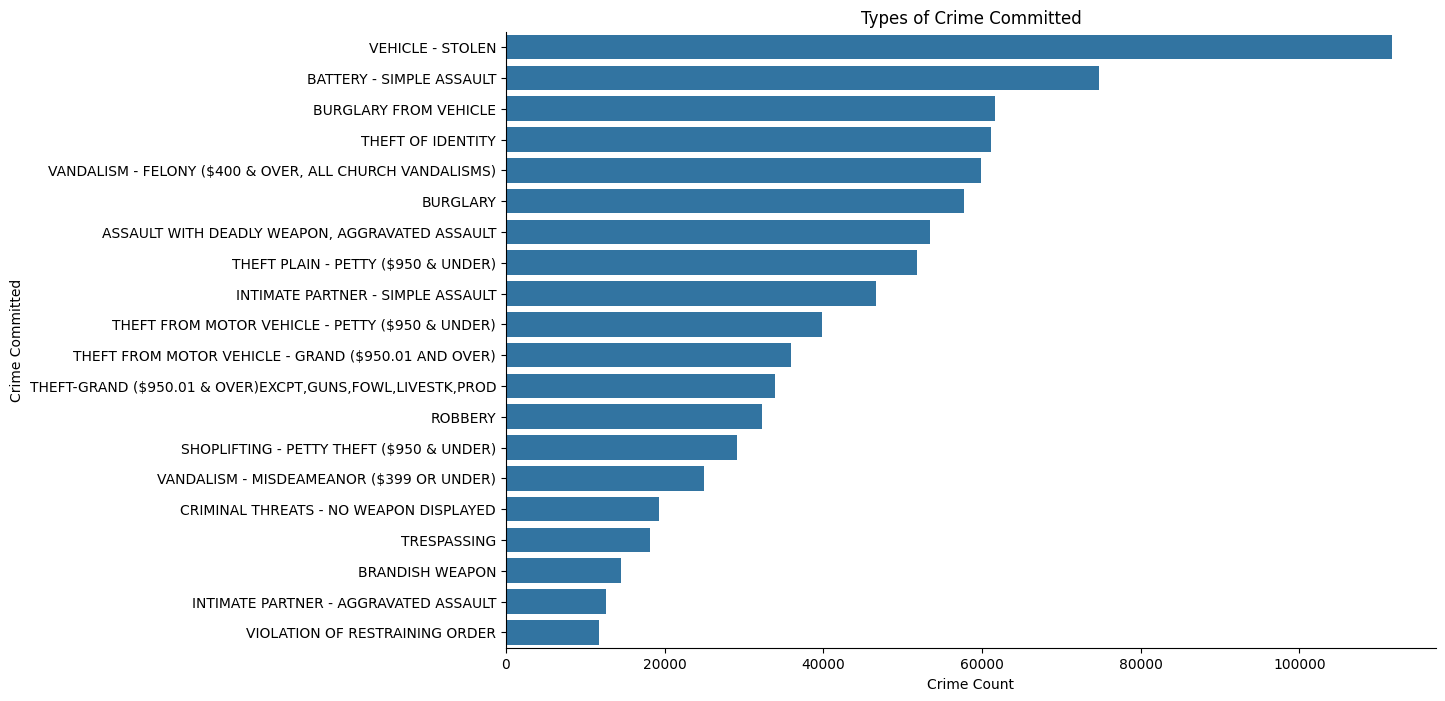

In [140]:

fig, ax = plt.subplots()
# Plotting crimes by type
sns.barplot(y=df["Crm Cd Desc"].value_counts().index[0:20],
                 x=df["Crm Cd Desc"].value_counts().head(20), ax=ax)
# Axes
ax.set_title("Types of Crime Committed")
ax.set_xlabel("Crime Count")
ax.set_ylabel("Crime Committed")
sns.despine()

In [141]:
# Changing the abbreviations to the whole description
Victim_desc = {
    "A": "Other Asian",
    "B": "Black",
    "C": "Chinese",
    "D": "Cambodian",
    "F": "Filipino",
    "G": "Guamanian",
    "H": "Hispanic/Latin/Mexican",
    "I": "American Indian/Alaskan Native",
    "J": "Japanese",
    "K": "Korean",
    "L": "Laotian",
    "O": "Other",
    "P": "Pacific Islander",
    "S": "Samoan",
    "U": "Hawaiian",
    "V": "Vietnamese",
    "W": "White",
    "X": "Unknown",
    "Z": "Asian Indian"
}
df["Vict Descent"] = df["Vict Descent"].map(Victim_desc)


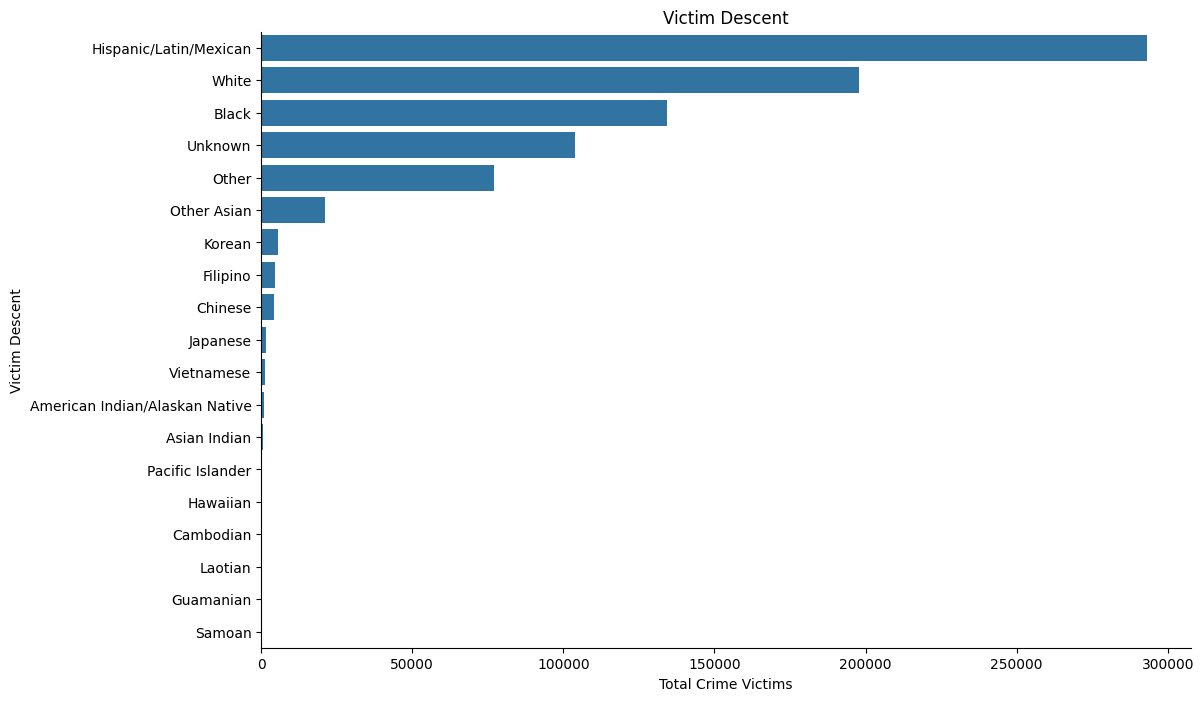

In [142]:
fig, ax = plt.subplots()
# Plotting by victim gescent generally
sns.barplot(y=df["Vict Descent"].value_counts().index, x=df["Vict Descent"].value_counts(), ax=ax)
# Axes
ax.set_title("Victim Descent")
ax.set_xlabel("Total Crime Victims")
ax.set_ylabel("Victim Descent")
sns.despine()